<a href="https://colab.research.google.com/github/YABIGAIL23/SIMULACION-I/blob/main/ACTIVIDAD_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ACTIVIDAD 10
### Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos). Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos.

##1. Identifique las variables
Sean las variables aleatorias:

- X: Tiempo de llegada de la Persona 1.
- Y: Tiempo de llegada de la Persona 2.

Variable que necesitamos:
- ∣X-Y∣: Tiempo absoluto de espera entre las dos personas.

##2. Determine la distribución de probabilidad
**Distribución de X e Y**

Ambas siguen una distribución uniforme continua en [0,30] ya que cada persona tiene igual probabilidad de llegar en cualquier momento del intervalo.

**Distribución de ∣X-Y∣:**

Sigue una distribución triangular con parámetros dependientes del rango [0,30].

##3. Modele las variables aleatorias

In [22]:
import numpy as np
import matplotlib.pyplot as plt

n = 100000  #Número de simulaciones
i = 30       # Intervalo [0, 30] minutos
espera = 10       #Tiempo de espera

# Generar muestras aleatorias
X = np.random.uniform(0, i, n)
Y = np.random.uniform(0, i, n)

#Calcular el tiempo de espera absoluto
t_esp = np.abs(X - Y)

##4. Defina el modelo del sistema y los objetivos de la simulación

- **Objetivo:**
  - Estimar P(∣X-Y∣≤10).
  - Comparar la probabilidad simulada con el resultado teórico (5/9≈0.5556).

- **Modelo del sistema:**
  - Dos llegadas independientes y uniformemente distribuidas en [0,30].
  - El sistema "falla" si ∣X-Y∣>10.



##5. Diseñe el experimento

In [23]:
#Objetivo: Estimar P(|X - Y| <= 10)
prob_estimada = np.mean(t_esp <= espera)

#(5/9 ≈ 0.5556)
prob_teorica = 5 / 9

##6. Repita el experimento veces

- **Ley de los Grandes Números:**
A mayor n, la estimación converge al valor teórico.

- **Teorema del Límite Central:**
El error sigue una distribución normal con varianza decreciente $(\sigma/\sqrt n)$.

##RESULTADOS


Resultados de la Simulación Monte Carlo

Probabilidad estimada: 0.5558
Probabilidad teórica:  0.5556
Error relativo:        0.0476%


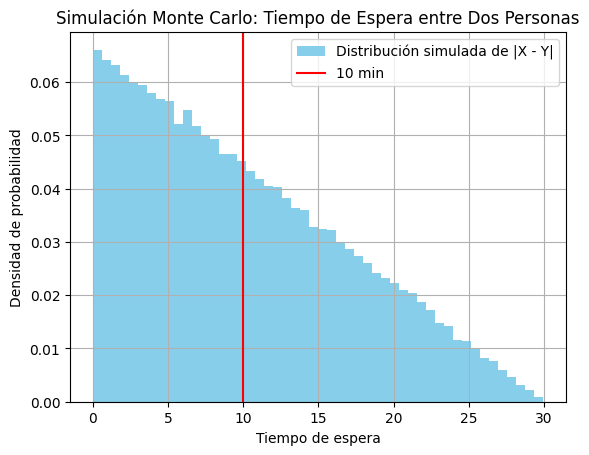

In [24]:
print("\nResultados de la Simulación Monte Carlo\n")
print(f"Probabilidad estimada: {prob_estimada:.4f}")
print(f"Probabilidad teórica:  {prob_teorica:.4f}")
print(f"Error relativo:        {np.abs(prob_estimada - prob_teorica)/prob_teorica * 100:.4f}%")

#Histograma
plt.hist(t_esp, bins=50, density=True, color="skyblue",
         label="Distribución simulada de |X - Y|")
plt.axvline(espera, color='red', label=f"{espera} min")
plt.xlabel("Tiempo de espera")
plt.ylabel("Densidad de probabilidad")
plt.title("Simulación Monte Carlo: Tiempo de Espera entre Dos Personas")
plt.legend()
plt.grid()
plt.show()